In [ ]:
!pip install obspy tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from obspy import read
print("ObsPy version:", read)

ObsPy version: <function read at 0x7a449b54af20>


In [ ]:
from obspy.signal.filter import bandpass

plt.rcParams["figure.figsize"] = (12, 4)

In [ ]:
!wget -q https://examples.obspy.org/RJOB_061005_072159.ehz.new -O earthquake.mseed


In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt


In [ ]:
client = Client("IRIS")


In [ ]:
t1 = UTCDateTime("2010-02-27T06:34:00")
t2 = t1 + 300  # 5 minutes window

eq_stream = client.get_waveforms(
    network="IU",
    station="ANMO",
    location="00",
    channel="BHZ",
    starttime=t1,
    endtime=t2
)

print(eq_stream)


1 Trace(s) in Stream:
IU.ANMO.00.BHZ | 2010-02-27T06:34:00.019538Z - 2010-02-27T06:38:59.969538Z | 20.0 Hz, 6000 samples


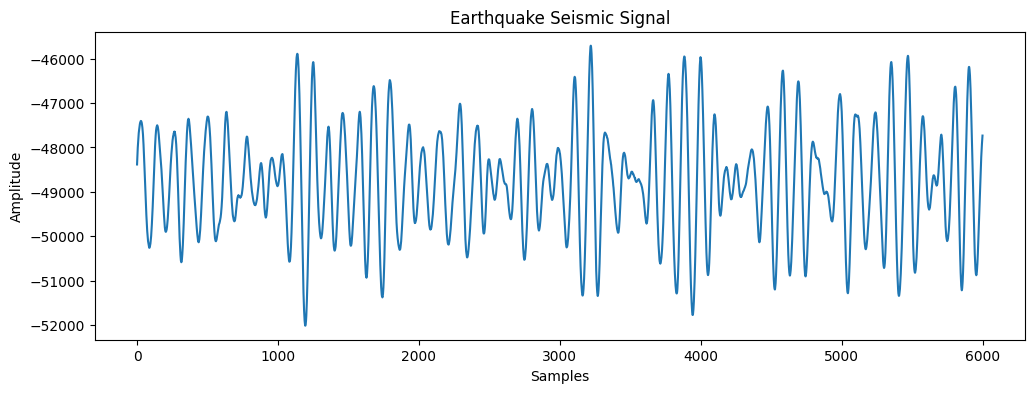

In [ ]:
eq_trace = eq_stream[0]

plt.figure(figsize=(12,4))
plt.plot(eq_trace.data)
plt.title("Earthquake Seismic Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
t1_noise = UTCDateTime("2010-02-20T00:00:00")
t2_noise = t1_noise + 300

noise_stream = client.get_waveforms(
    network="IU",
    station="ANMO",
    location="00",
    channel="BHZ",
    starttime=t1_noise,
    endtime=t2_noise
)

print(noise_stream)


1 Trace(s) in Stream:
IU.ANMO.00.BHZ | 2010-02-20T00:00:00.019500Z - 2010-02-20T00:04:59.969500Z | 20.0 Hz, 6000 samples


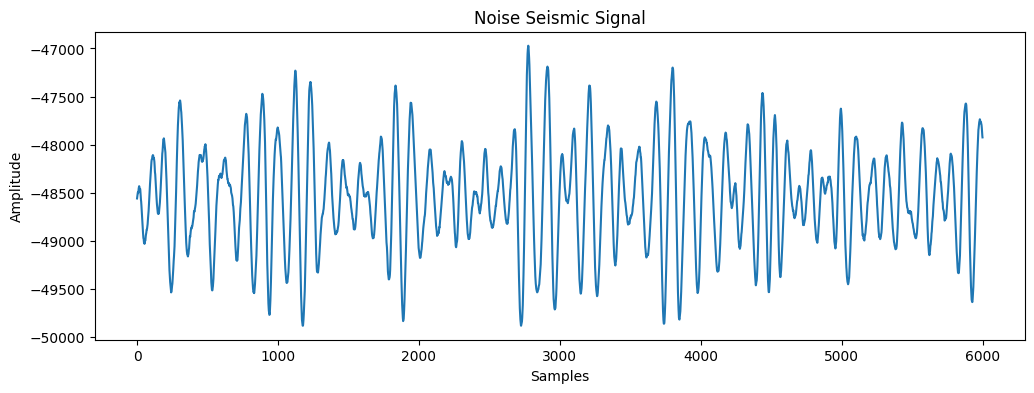

In [ ]:
noise_trace = noise_stream[0]

plt.figure(figsize=(12,4))
plt.plot(noise_trace.data)
plt.title("Noise Seismic Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()
